In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['figure.dpi'] = 70

In [2]:
tips = sns.load_dataset("tips")

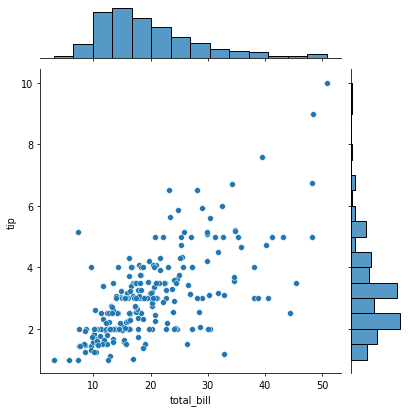

In [3]:
#1
g = sns.JointGrid(data = tips, x = "total_bill", y = "tip")
g.plot(sns.scatterplot, sns.histplot);

In [4]:
#2
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Basics

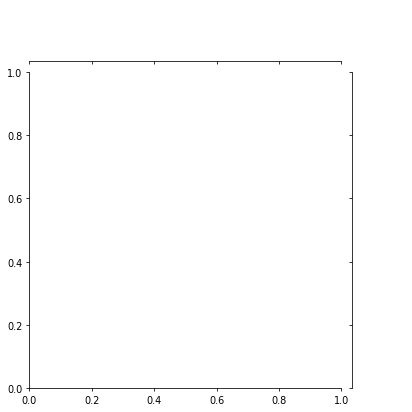

In [5]:
g = sns.JointGrid();

In [6]:
type(g)

seaborn.axisgrid.JointGrid

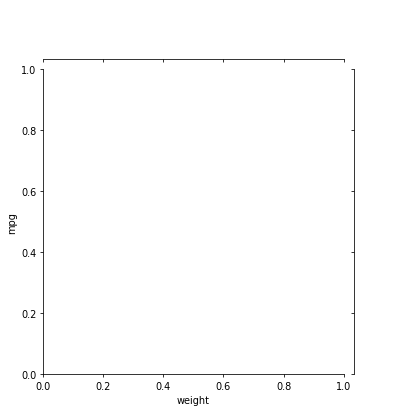

In [7]:
g = sns.JointGrid(data=cars, x='weight', y='mpg');

## .plot()

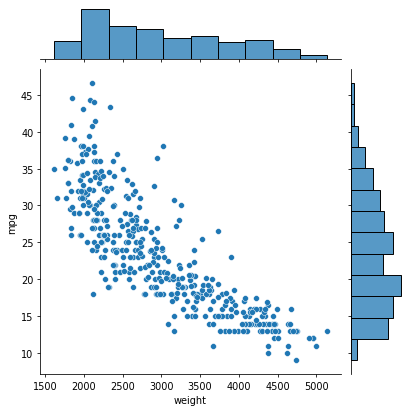

In [8]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot);

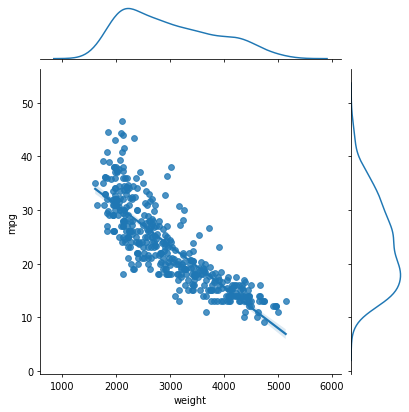

In [9]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.regplot, sns.kdeplot);

# Joint and Marginal Plots

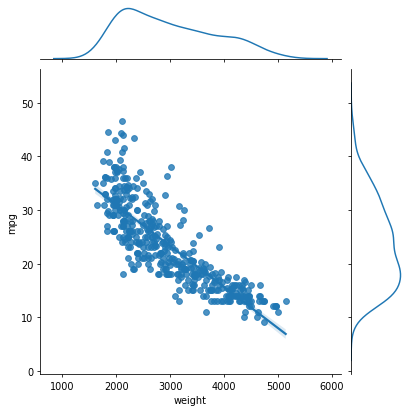

In [10]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.regplot, sns.kdeplot);

## .plot_joint(), .plot_marginals()

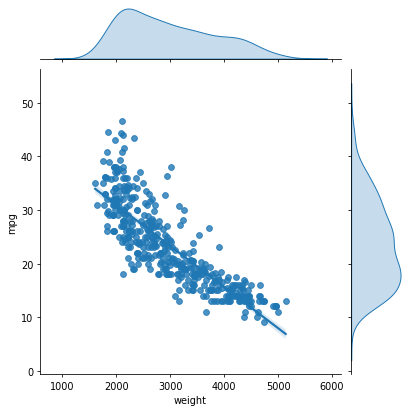

In [11]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.kdeplot, fill=True);  #syntax used to style plot types separately

# JointGrid Axes

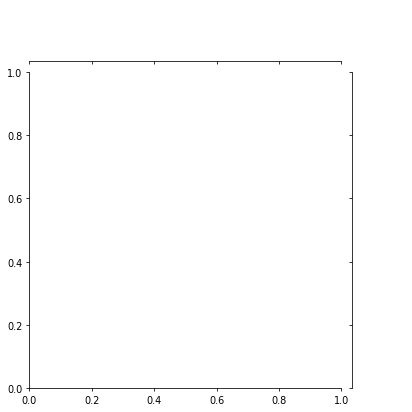

In [12]:
g = sns.JointGrid();

In [13]:
type(g.ax_marg_x)

matplotlib.axes._subplots.AxesSubplot

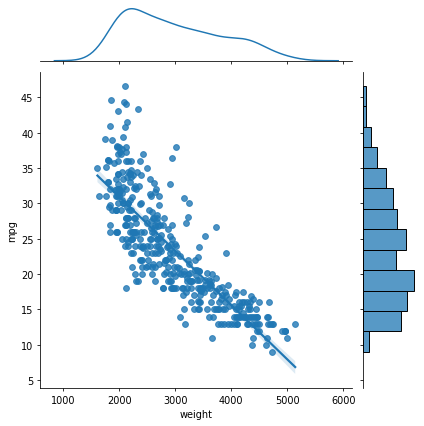

In [14]:
g = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint)
sns.kdeplot(x=x, ax=g.ax_marg_x)
sns.histplot(y=y, ax=g.ax_marg_y);

# Hue

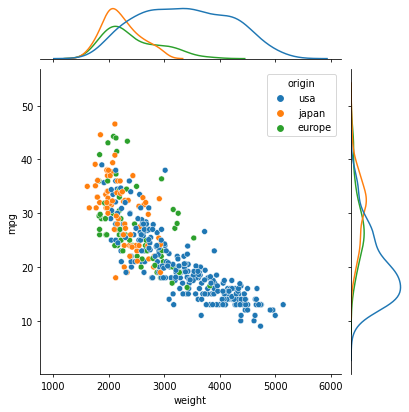

In [15]:
g = sns.JointGrid(data=cars, x='weight', y='mpg', hue='origin')
g.plot(sns.scatterplot, sns.kdeplot);

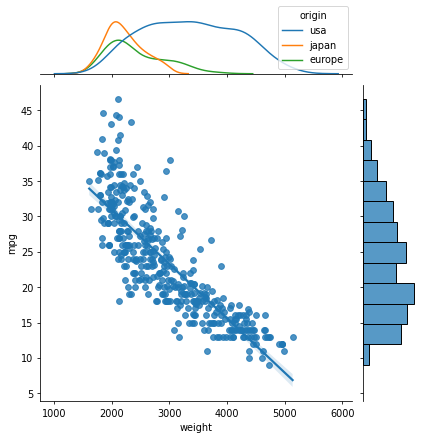

In [16]:
g = sns.JointGrid()
x, y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint)
sns.kdeplot(x=x, ax=g.ax_marg_x, hue=cars.origin)  
sns.histplot(y=y, ax=g.ax_marg_y);

# Styling

## General Styling

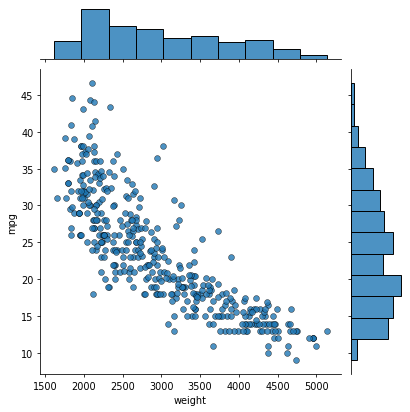

In [17]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot, alpha=0.8, edgecolor='black');

## Plot-specific Keywords

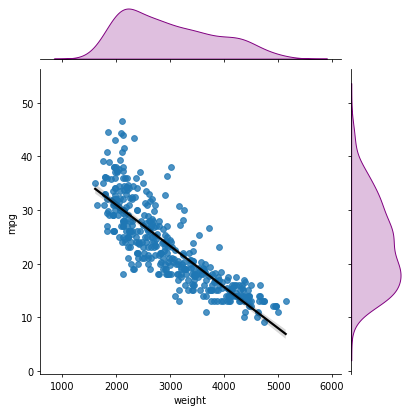

In [18]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot_joint(sns.regplot, line_kws={'color': 'black'})
g.plot_marginals(sns.kdeplot, fill=True, color='purple');

## Joint Grid Properties

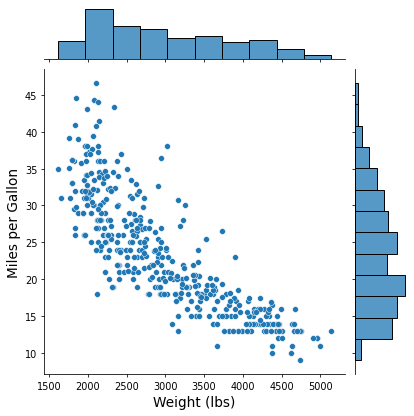

In [19]:
g = sns.JointGrid(data=cars, x='weight', y='mpg')
g.plot(sns.scatterplot, sns.histplot)
g.set_axis_labels(xlabel='Weight (lbs)', ylabel='Miles per Gallon', fontsize=14);
#g.savefig('Joint_Grid_Example.png');

## Thumbnail and Overlays

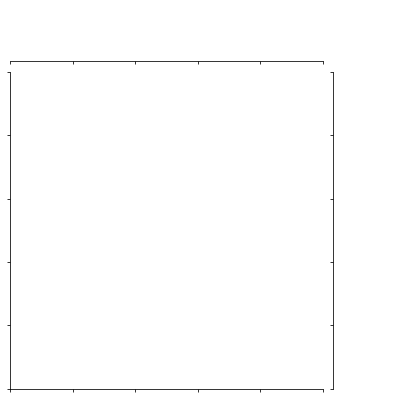

In [20]:
g = sns.JointGrid()
ax = g.ax_joint
ax.set_xticklabels([])
ax.set_yticklabels([]);
#g.savefig('25jointgrid_image_blank.png', dpi=200)

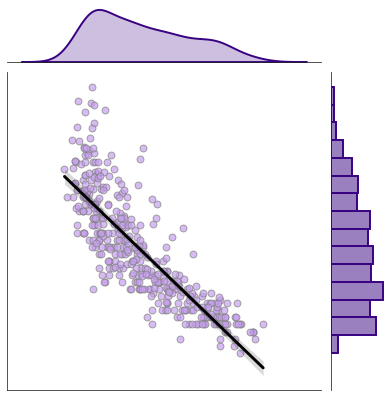

In [21]:
sns.set_style('white')

g = sns.JointGrid()
x,y = cars.weight, cars.mpg
sns.regplot(x=x, y=y, ax=g.ax_joint, ci=99, 
            scatter_kws={'color': 'xkcd:lavender', 'alpha': 0.7, 'ec': 'gray', 's': 50}, 
            line_kws={'color': 'black', 'lw': 3}
           )
sns.kdeplot(x=x, ax=g.ax_marg_x, fill=True, color='xkcd:indigo', lw=2 )
sns.histplot(y=y, bins=15, ax=g.ax_marg_y, lw=2, color='xkcd:indigo', alpha=0.5, ec='xkcd:indigo')
g.set_axis_labels(xlabel='', ylabel='')

ax = g.ax_joint
ax.set_xticklabels([])
ax.set_yticklabels([]);
#g.savefig('25jointgrid_image_thumb.png', dpi=200);

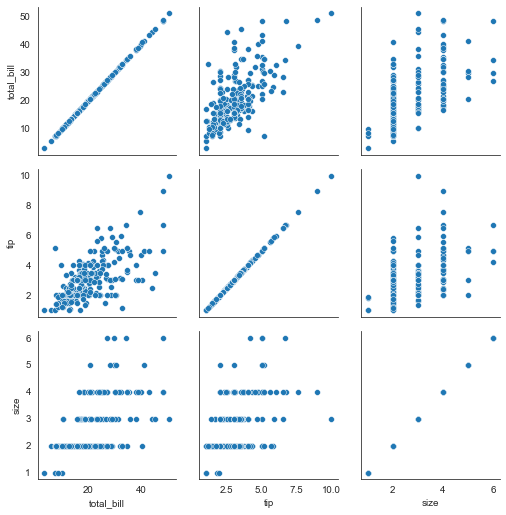

In [22]:
#3
g = sns.PairGrid(tips)
g = g.map(sns.scatterplot);

In [23]:
#4
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Basics

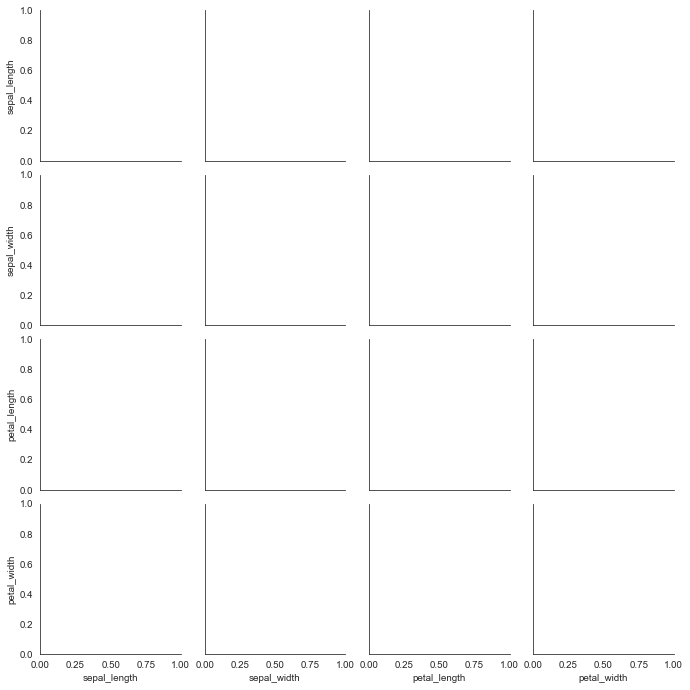

In [24]:
g = sns.PairGrid(iris);

In [25]:
type(g)

seaborn.axisgrid.PairGrid

## .map()

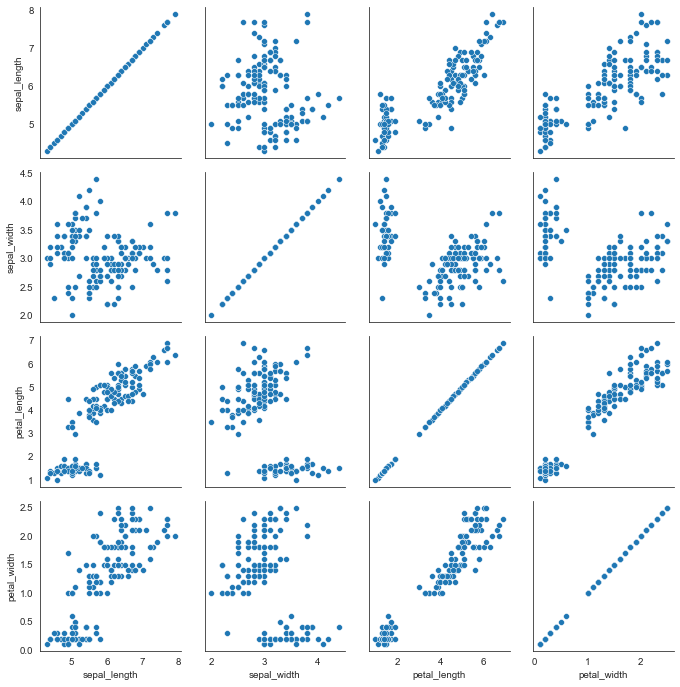

In [26]:
g = sns.PairGrid(iris)
g.map(sns.scatterplot);

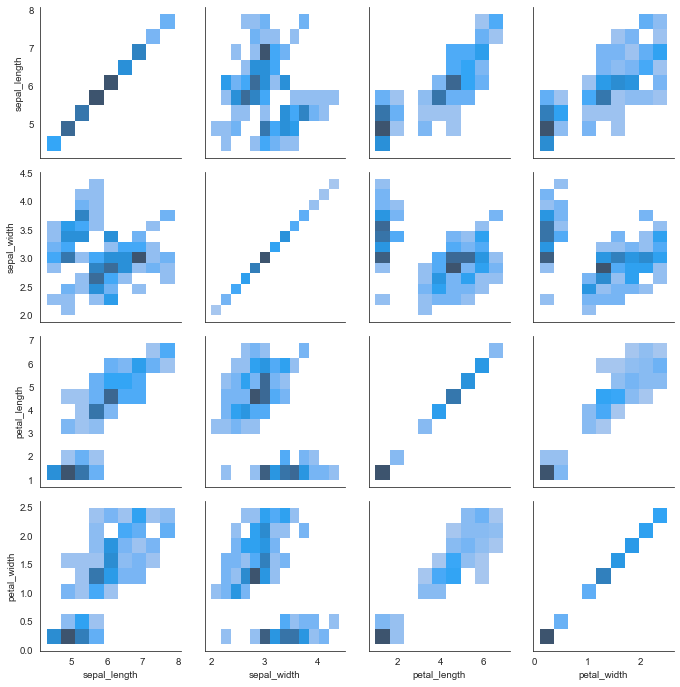

In [27]:
g = sns.PairGrid(iris)
g.map(sns.histplot);

## Matplotlib Functions

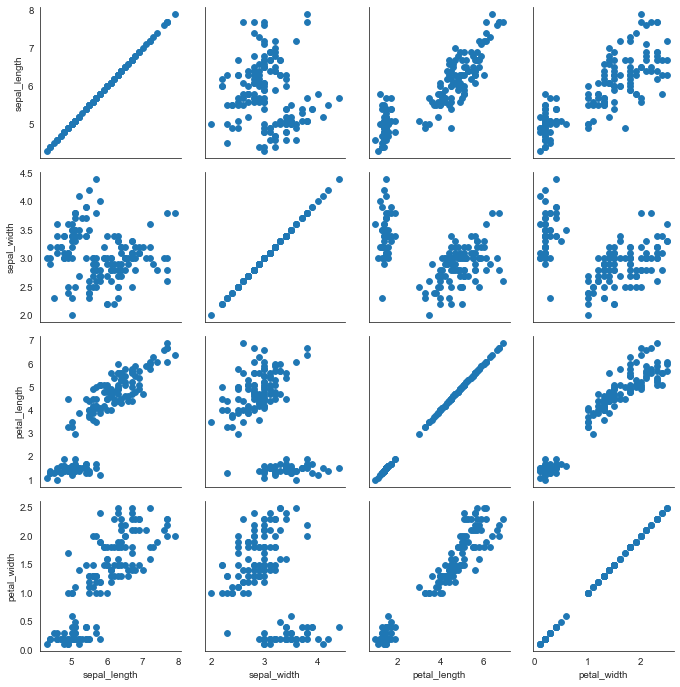

In [28]:
g = sns.PairGrid(iris)
g.map(plt.scatter);

# PairGrid Anatomy

## .map_diag() and .map_offdiag()

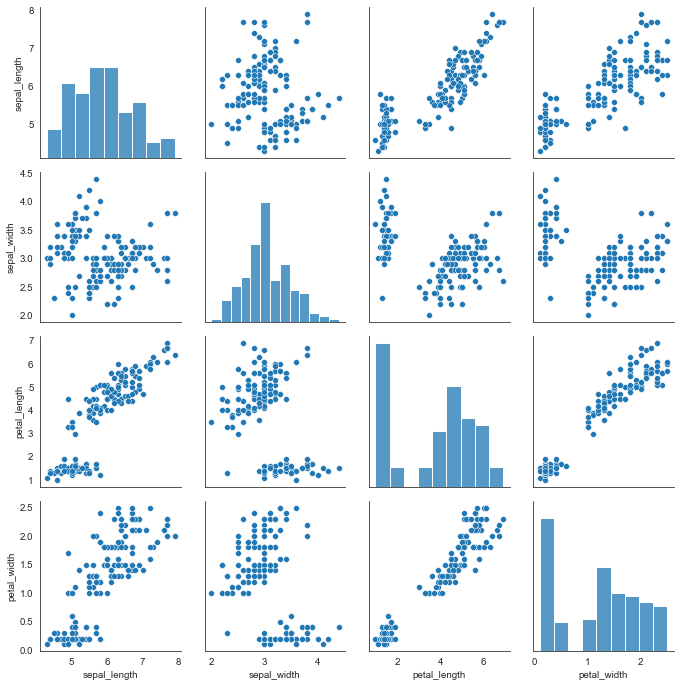

In [29]:
g = sns.PairGrid(iris)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot);

## .map_upper() and .map_lower()

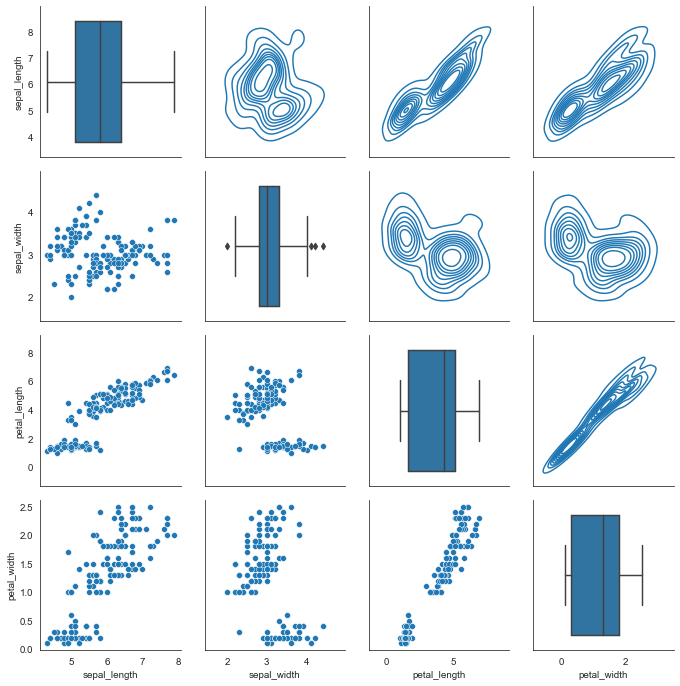

In [30]:
g = sns.PairGrid(iris)
g.map_lower(sns.scatterplot)
g.map_diag(sns.boxplot)
g.map_upper(sns.kdeplot);

## corner

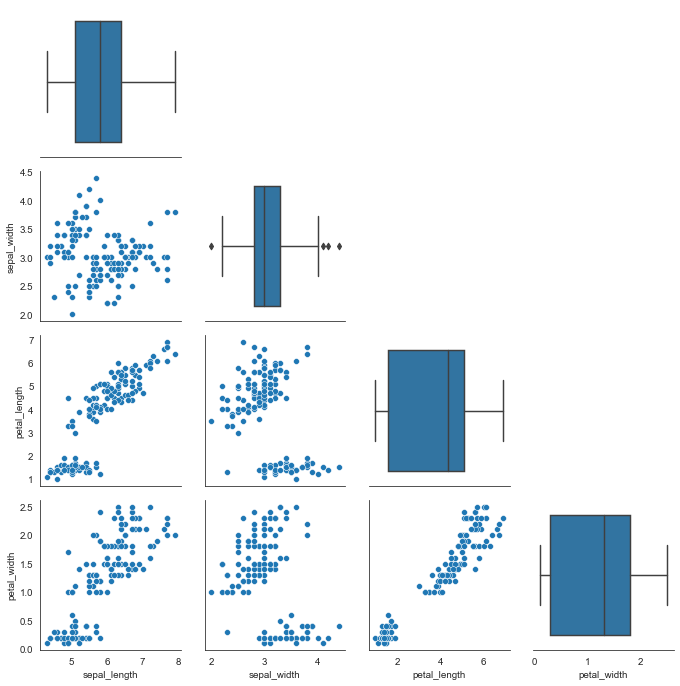

In [31]:
g = sns.PairGrid(iris, corner=True)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.boxplot);

# Additional Options

## hue & diag_sharey

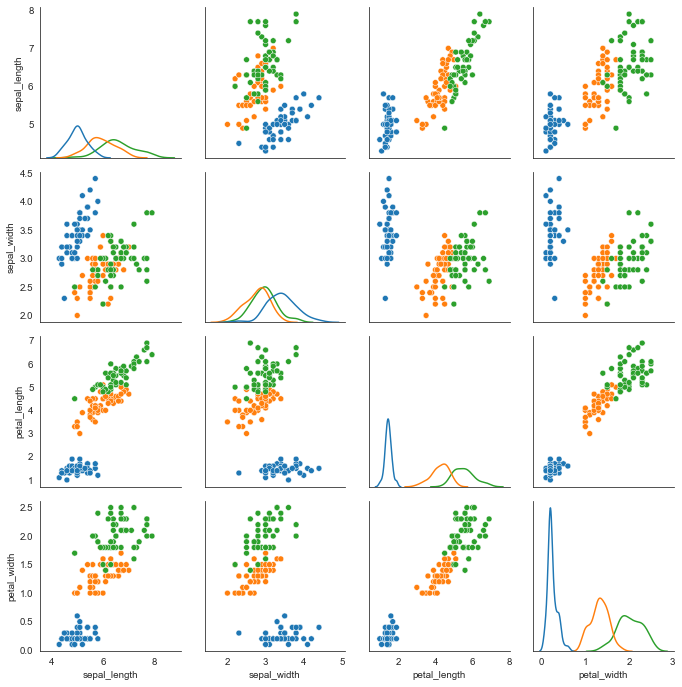

In [32]:
g = sns.PairGrid(iris, hue='species')
g.map_diag(sns.kdeplot) 
g.map_offdiag(sns.scatterplot);

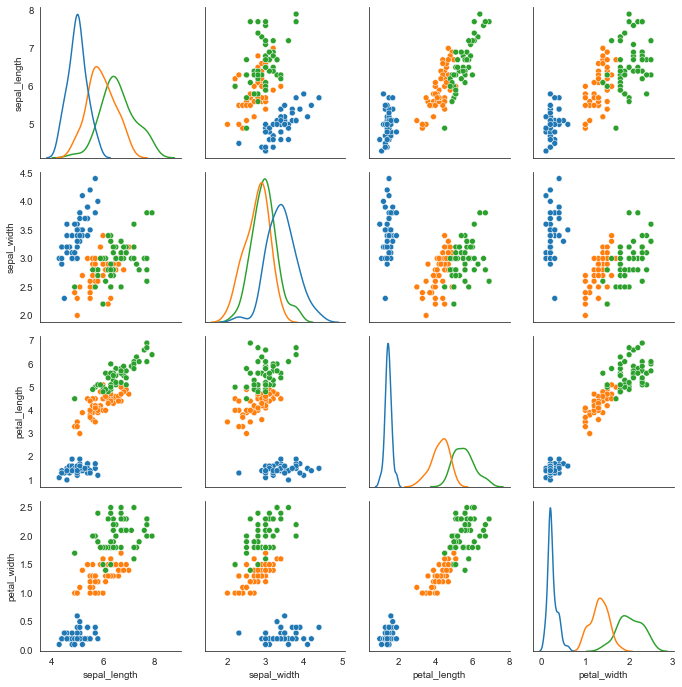

In [33]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_diag(sns.kdeplot) 
g.map_offdiag(sns.scatterplot);
# diag_sharey dioganal'daki ölçeklerin hepsini aynı olcek uzerınden yapar

## vars

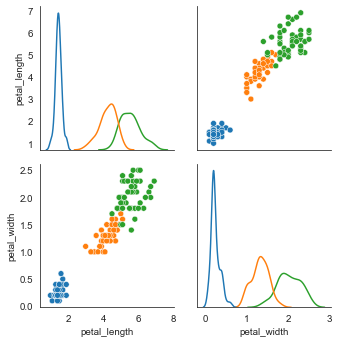

In [34]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, vars=['petal_length', 'petal_width'])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot);

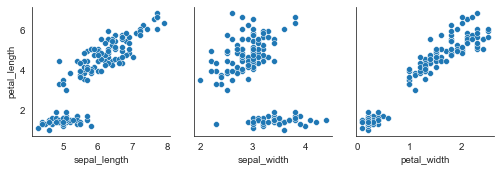

In [35]:
g = sns.PairGrid(iris,  
                 x_vars=['sepal_length', 'sepal_width', 'petal_width'],
                 y_vars=['petal_length']
                )
g.map(sns.scatterplot);

# Styling

## Plot-specific Keywords

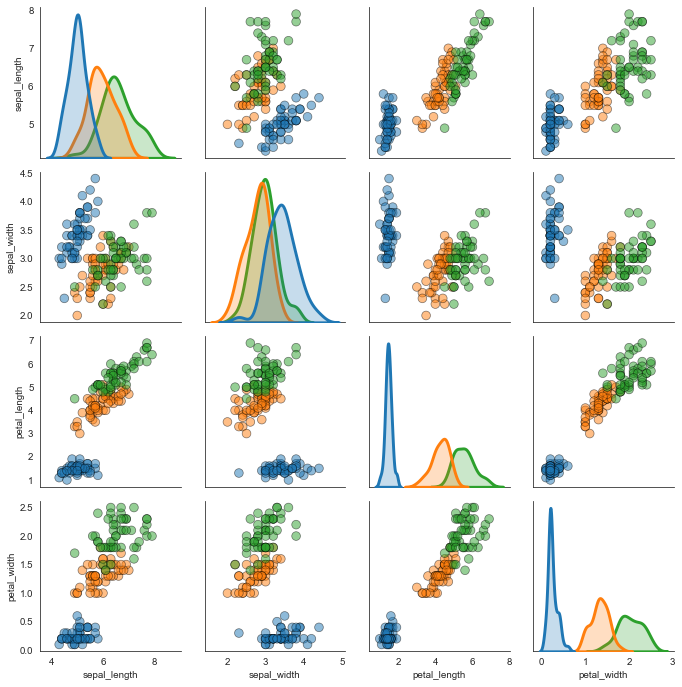

In [36]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_diag(sns.kdeplot, fill=True, lw=3)
g.map_offdiag(sns.scatterplot, s=80, alpha=.5, ec='black');

## height, aspect

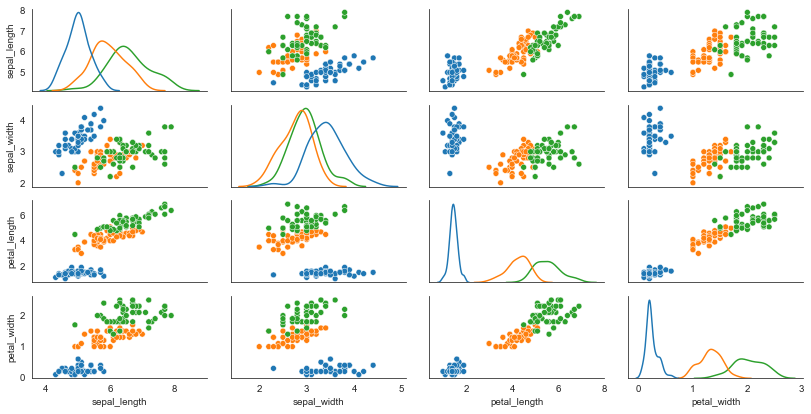

In [37]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, height=1.5, aspect=2)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot);

## palette

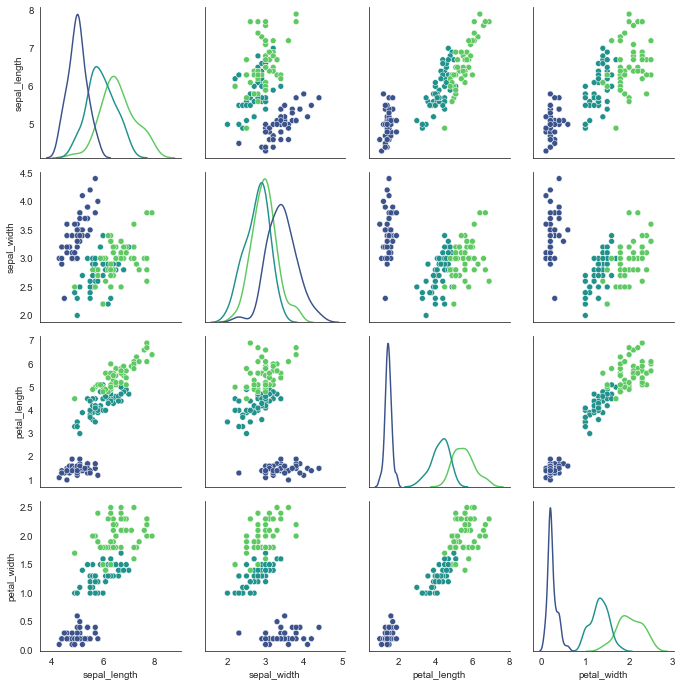

In [38]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, palette='viridis')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot);

## .add_legend()

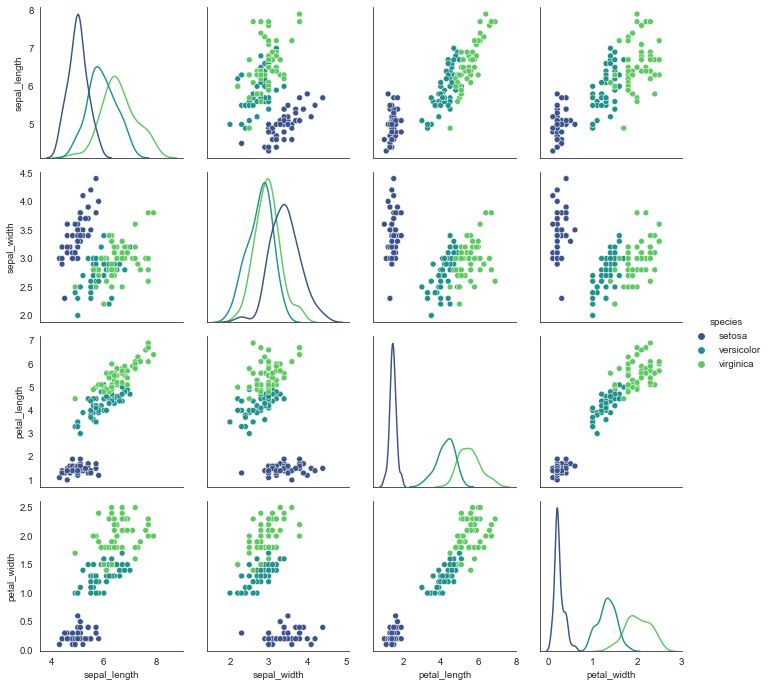

In [39]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, palette='viridis')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

# Thumbnail and Overlays

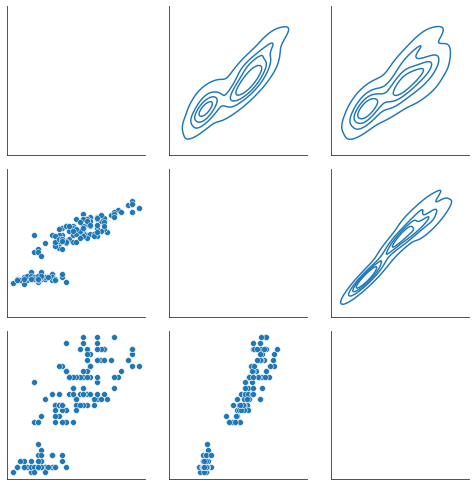

In [40]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, n_levels=5)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

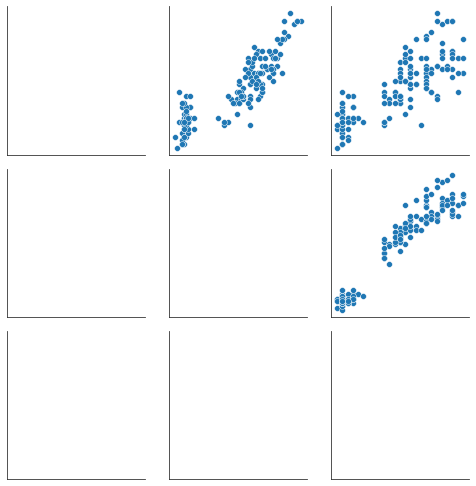

In [41]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
g.map_upper(sns.scatterplot)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

## Thumbnail

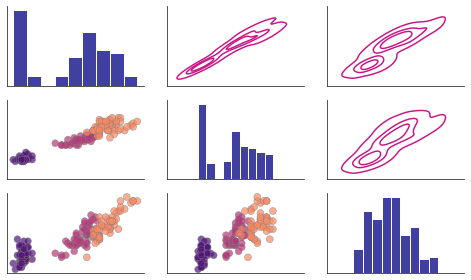

In [42]:
g = sns.PairGrid(iris, 
                 hue='species', 
                 palette='magma', 
                 vars=['petal_length', 'petal_width', 'sepal_length'], 
                 height=1.5, 
                 aspect=1.65, 
                 diag_sharey=False
                )
g.map_lower(sns.scatterplot, s=50, alpha=0.7, ec='gray')
g.map_diag(sns.histplot,hue=None, color='navy')
g.map_upper(sns.kdeplot, n_levels=4,hue=None, color='mediumvioletred')
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

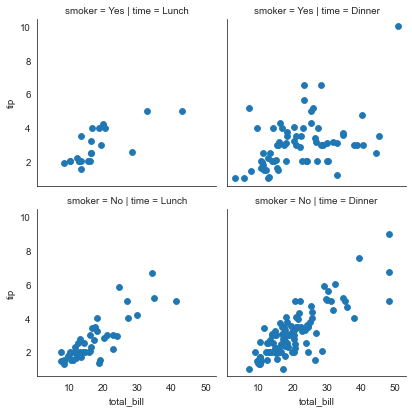

In [43]:
#5
g = sns.FacetGrid(data = tips, col = "time", row = "smoker")
g = g.map(plt.scatter, "total_bill", "tip");

In [44]:
#6
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Basics

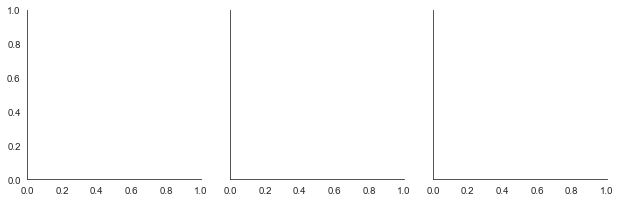

In [45]:
g = sns.FacetGrid(penguins, col='island');

In [46]:
type(g)

seaborn.axisgrid.FacetGrid

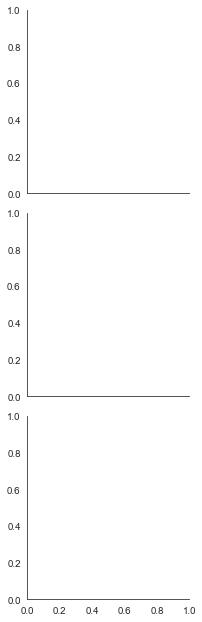

In [47]:
g = sns.FacetGrid(penguins, row='island'); 

## .map()

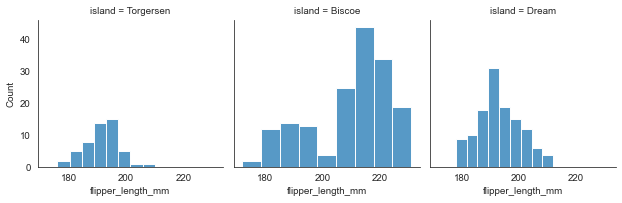

In [48]:
g = sns.FacetGrid(penguins, col='island')
g.map(sns.histplot, "flipper_length_mm");
# y eksenınde yazdıramazdık. onun için .map_dataframe() kullandık
# konumsal argumanlara ızın verir

## .map_dataframe()

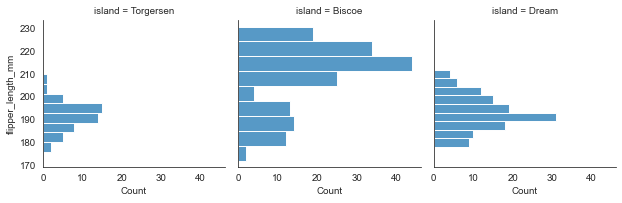

In [49]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, y='flipper_length_mm'); 

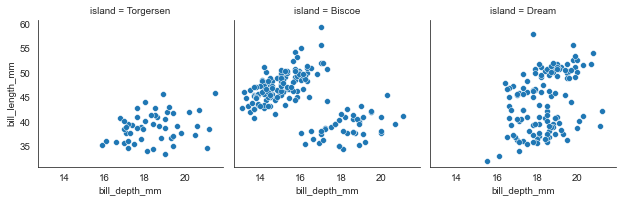

In [50]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm');

# Methods and Attributes

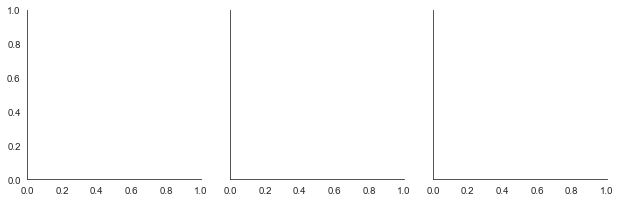

In [51]:
g = sns.FacetGrid(penguins, col='island');

In [52]:
type(g)

seaborn.axisgrid.FacetGrid

## .set_axis_labels()

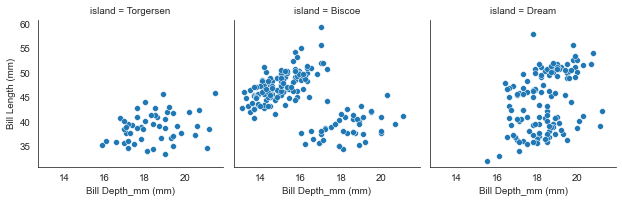

In [53]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Bill Depth_mm (mm)', 'Bill Length (mm)');

## .set_titles() & col_template

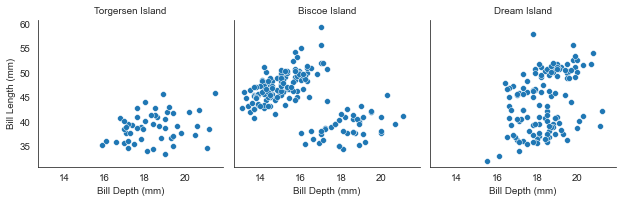

In [54]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Bill Depth (mm)', 'Bill Length (mm)')
g.set_titles(col_template='{col_name} Island');

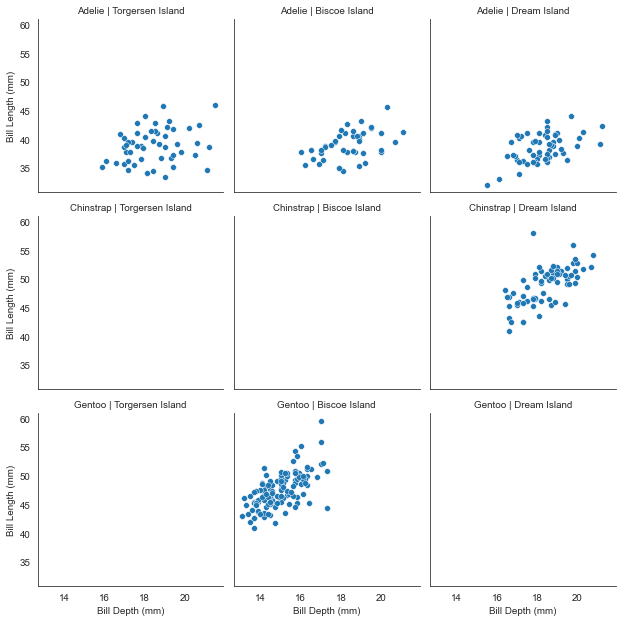

In [55]:
g = sns.FacetGrid(penguins, col='island', row='species')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Bill Depth (mm)', 'Bill Length (mm)')
g.set_titles(col_template='{col_name} Island', row_template='{row_name}');

## sharey, ylim

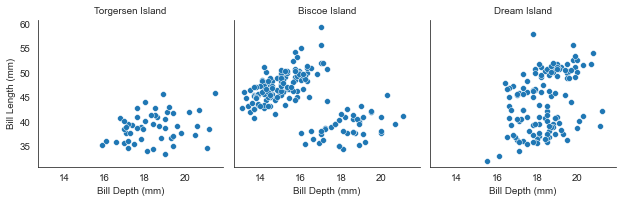

In [56]:
g = sns.FacetGrid(penguins, col='island')

g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Bill Depth (mm)', 'Bill Length (mm)')
g.set_titles(col_template='{col_name} Island');

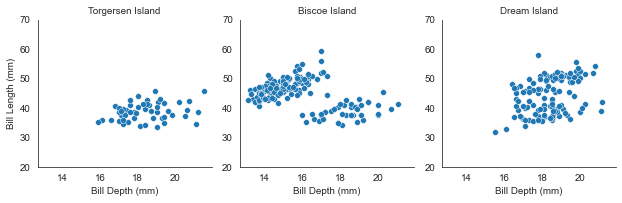

In [57]:
g = sns.FacetGrid(penguins, col='island', sharey=False, ylim=(20, 70))

g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Bill Depth (mm)', 'Bill Length (mm)')
g.set_titles(col_template='{col_name} Island');
# sharey = False her grafıgın y eksen degerlerini getirir
# ylim ile de y eksenının deger aralıklarını belirttik

# Hue and Custom Functions

## hue

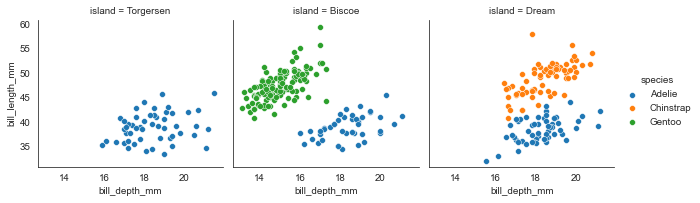

In [58]:
g = sns.FacetGrid(penguins, col='island', hue='species')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.add_legend();

## palette

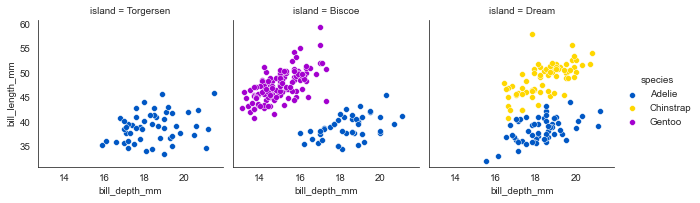

In [59]:
g = sns.FacetGrid(penguins, col='island', hue='species', palette='prism')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm') 
g.add_legend();

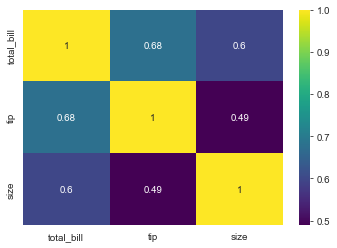

In [61]:
#7
sns.heatmap(tips.corr(), annot = True, cmap = "viridis");

# Basics

In [65]:
#8
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [66]:
(cars
 .groupby('origin')
 .cylinders
 .value_counts()
 .unstack()
 .fillna(0)
)

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


In [67]:
origin_cyl = (
    cars
    .groupby('origin')
    .cylinders
    .value_counts()
    .unstack()
    .fillna(0)
)

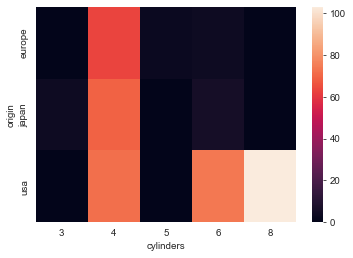

In [68]:
sns.heatmap(origin_cyl);

## Arrays

In [69]:
test_array = np.array([[1, 2], [3, 4]])

test_array

array([[1, 2],
       [3, 4]])

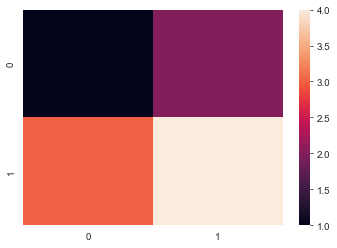

In [70]:
sns.heatmap(test_array);

## Transpose

In [71]:
origin_cyl.T

origin,europe,japan,usa
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


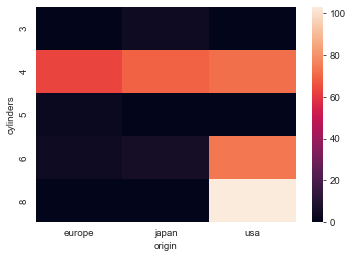

In [72]:
sns.heatmap(origin_cyl.T);

## Correlation

In [73]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


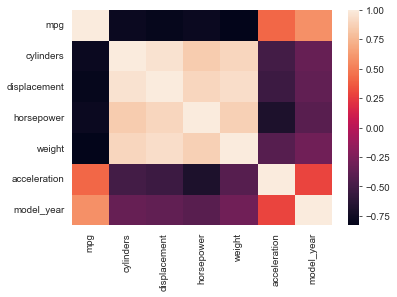

In [74]:
sns.heatmap(cars.corr());

## Color Palette

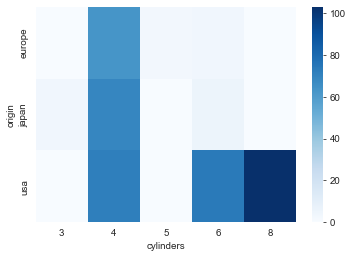

In [75]:
sns.heatmap(origin_cyl, cmap="Blues");

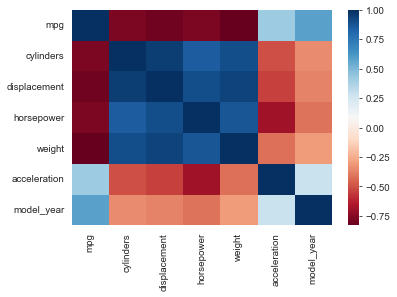

In [76]:
sns.heatmap(cars.corr(), cmap='RdBu');

## Controling the Colorbar Range: center, vmax, vmin

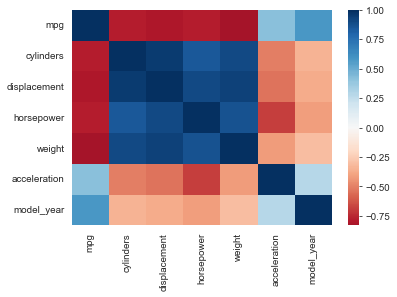

In [77]:
sns.heatmap(cars.corr(), cmap='RdBu', center=0);

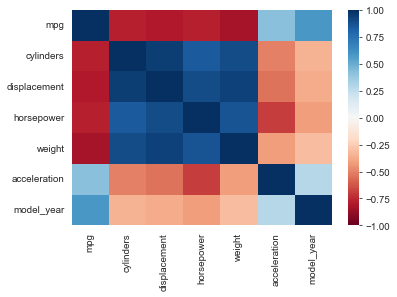

In [78]:
sns.heatmap(cars.corr(), cmap='RdBu', vmin=-1, vmax=1);

## Annotations

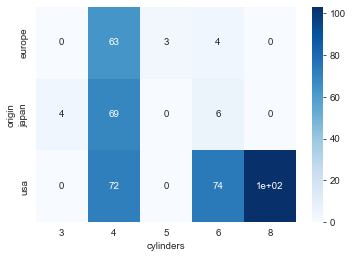

In [79]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True);

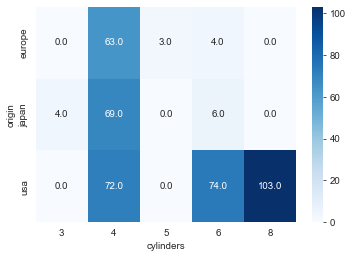

In [81]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt=".1f");

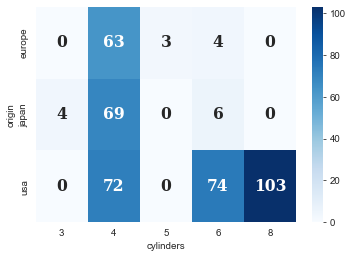

In [82]:
sns.heatmap(origin_cyl, 
            cmap='Blues', 
            annot=True, 
            fmt=".0f",
            annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif',
               # 'color': 'black'
            }
           );

# Styling

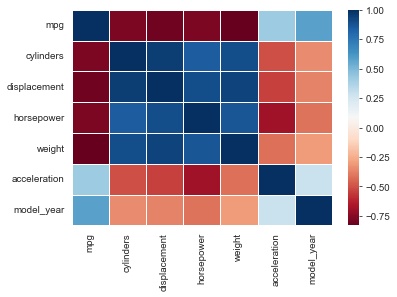

In [83]:
sns.heatmap(cars.corr(), cmap='RdBu', linewidth=1);

## linecolor

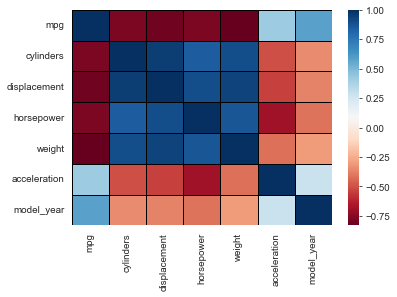

In [84]:
sns.heatmap(cars.corr(), 
            cmap='RdBu', 
            linewidth=1,
            linecolor='black'
           );

## Tick Labels

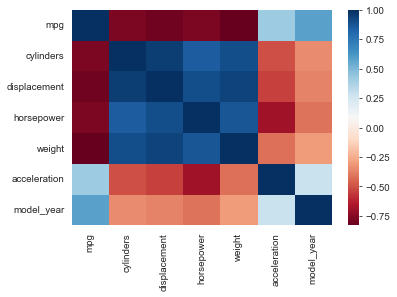

In [85]:
sns.heatmap(cars.corr(), cmap='RdBu');

In [86]:
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
          'Weight', 'Acceleration', 'Model Year'
         ]

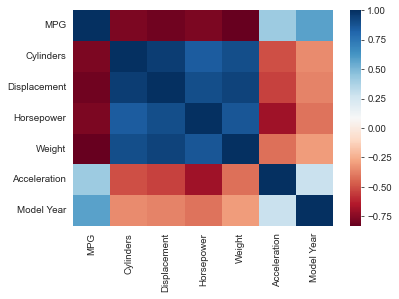

In [87]:
sns.heatmap(cars.corr(), 
            cmap='RdBu',
            xticklabels=labels,
            yticklabels=labels
           );

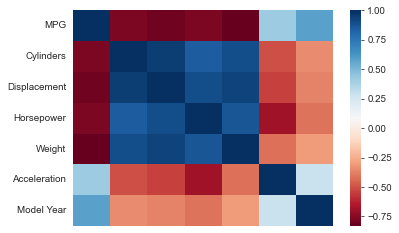

In [88]:
sns.heatmap(cars.corr(), 
            cmap='RdBu', 
            xticklabels=False,
            yticklabels=labels
           );

## square

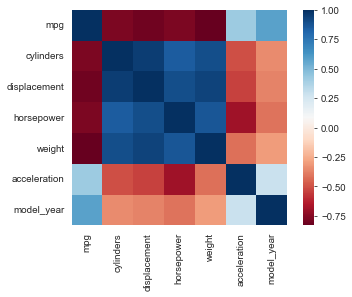

In [89]:
sns.heatmap(cars.corr(), 
            cmap='RdBu',
            square=True
           );

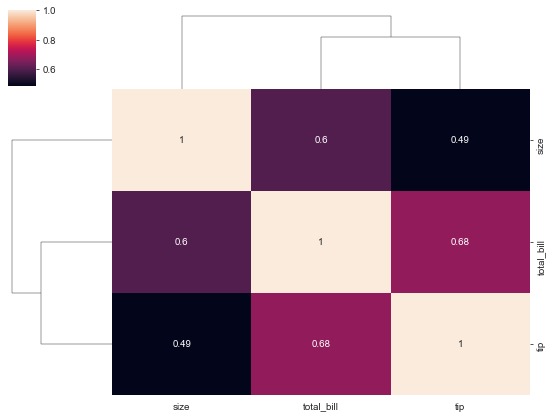

In [64]:
#9
sns.clustermap(tips.corr(), annot = True, figsize = (8,6));

# Basics - Toy Example

In [90]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

In [91]:
toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)

toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


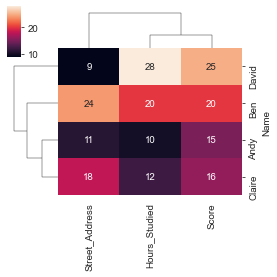

In [92]:
sns.clustermap(toy_data, figsize=(4, 4), annot=True);

## Basics - Penguins Dataset

In [93]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [94]:
numerical_cols = penguins.columns[2:6]
numerical_cols

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

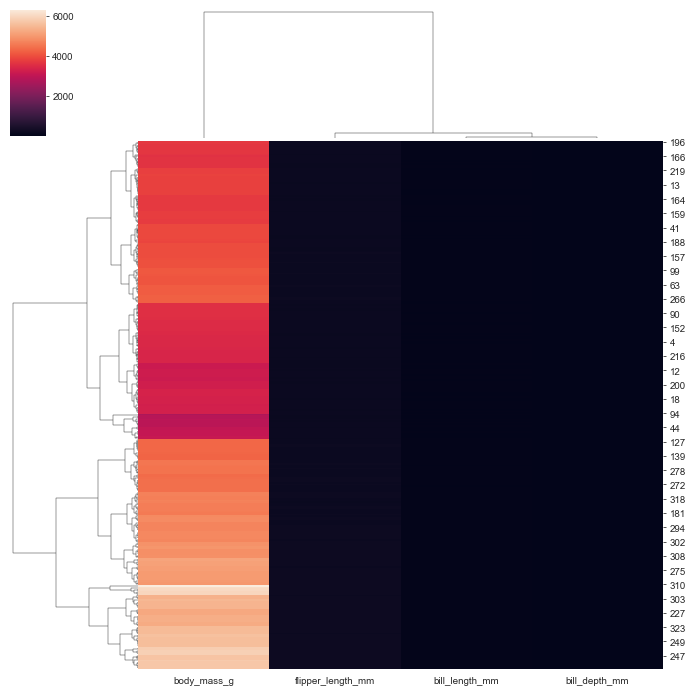

In [95]:
sns.clustermap(penguins[numerical_cols]);

## standard_scale

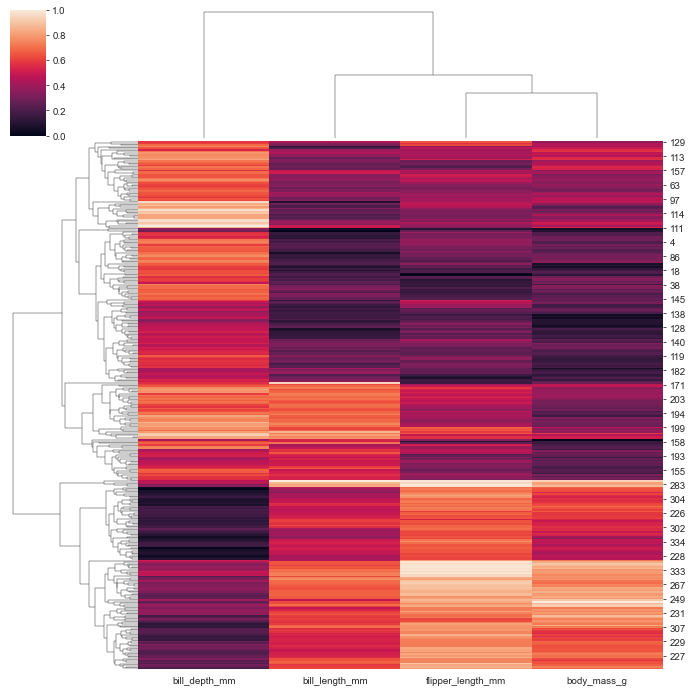

In [96]:
sns.clustermap(penguins[numerical_cols], standard_scale=1);

# Linkage and Metric

## method = Linkage

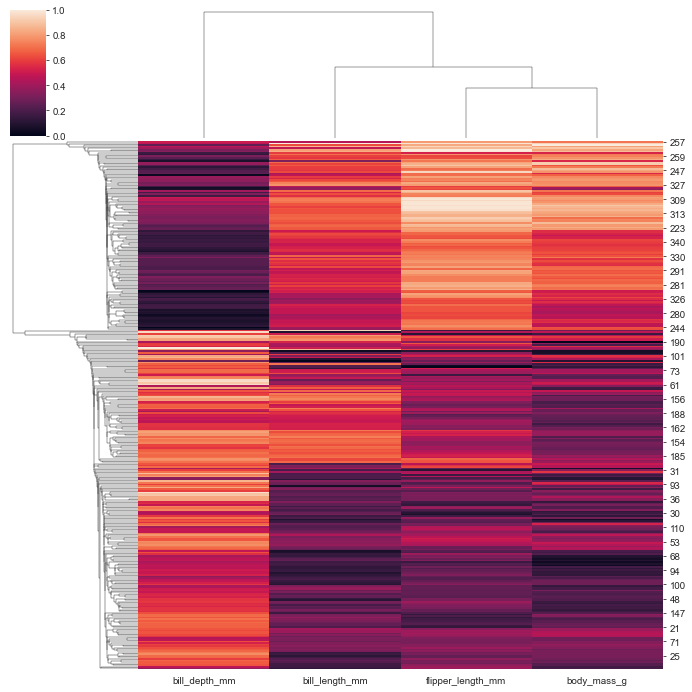

In [97]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, method='single');

## metric

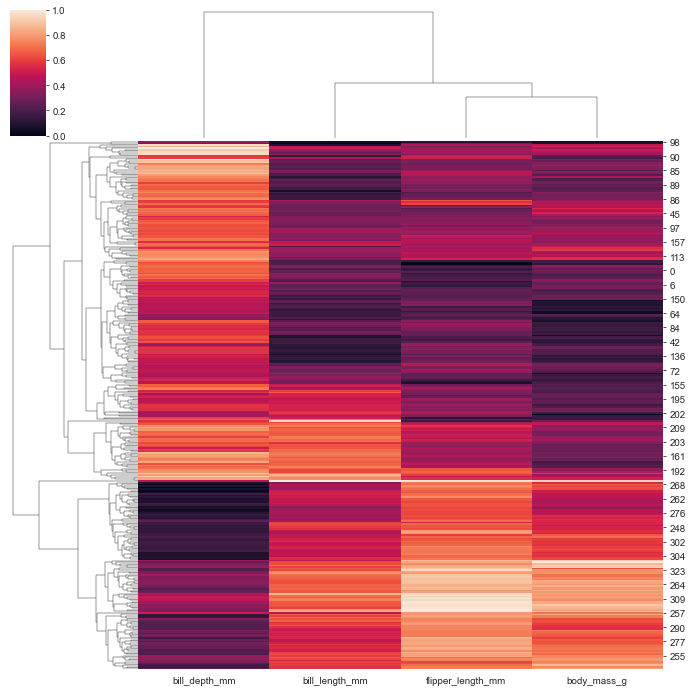

In [98]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, metric='cityblock');

# Additional Options

## row_colors

In [99]:
species_colors=penguins.species.map({
    'Adelie': 'blue',
    'Chinstrap': 'red',
    'Gentoo': 'green'
})

In [100]:
len(species_colors)

333

In [101]:
species_colors[:5]

0    blue
1    blue
2    blue
4    blue
5    blue
Name: species, dtype: object

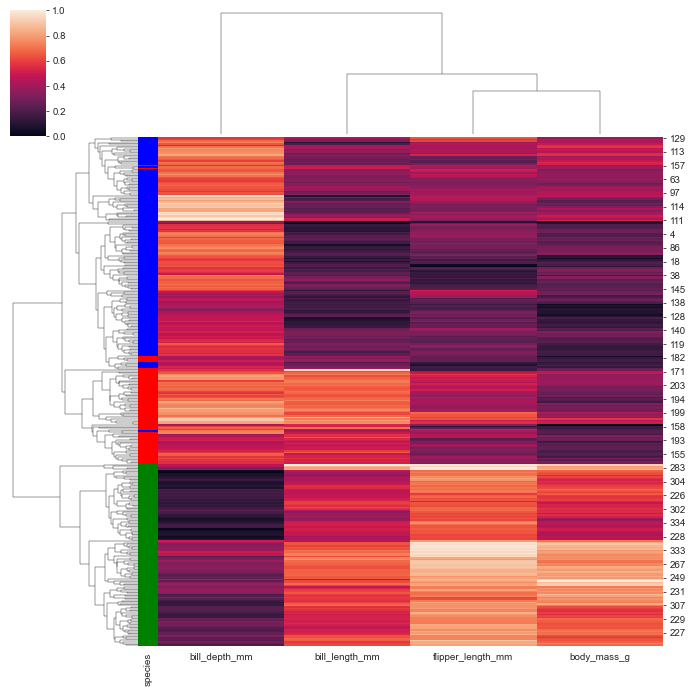

In [102]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, row_colors=species_colors);

# Styling

## cmap and vmin

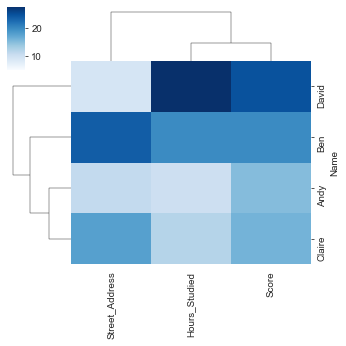

In [103]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5);

## row_cluster and cbar_pos

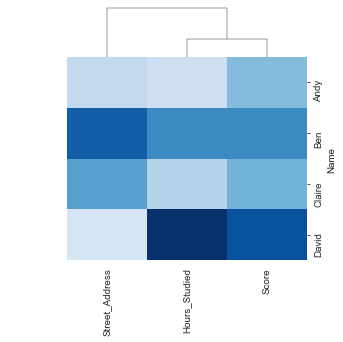

In [104]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5,
               row_cluster=False,
               cbar_pos=None #(0,.4,.05,.35)
              );

## Annotations with annot and fmt

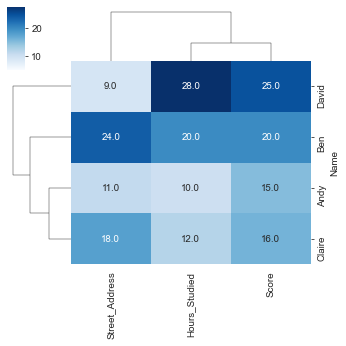

In [105]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5, annot=True, fmt='.1f');